In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 
import scipy.cluster.hierarchy as shc 


In [ ]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"

In [ ]:
X = pd.read_csv(train_url) 

# Dropping the CUST_ID column from the data  
X = X.drop('Name', axis = 1)
X = X.drop('Sex', axis = 1)
X = X.drop('Ticket', axis = 1)
X = X.drop('Cabin', axis = 1)
X = X.drop('Embarked', axis = 1)


# Handling the missing values 
X.fillna(method ='ffill', inplace = True) 

print(X.head()) 


   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500


In [ ]:
# Scaling the data so that all the features become comparable 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 

# Normalizing the data so that the data approximately 
# follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 

# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 


In [ ]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 


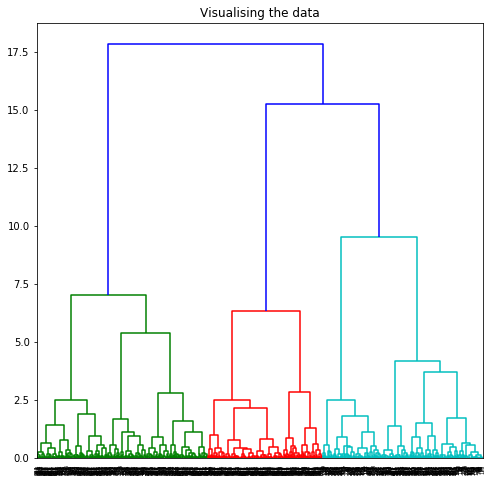

In [ ]:
plt.figure(figsize =(8, 8)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward'))) 


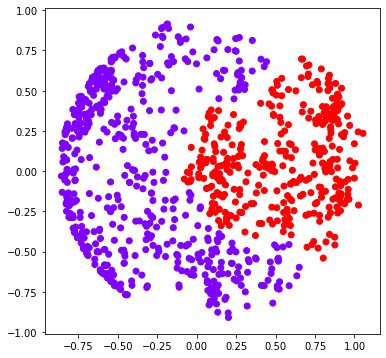

In [ ]:
ac2 = AgglomerativeClustering(n_clusters = 2) 
  
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = ac2.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

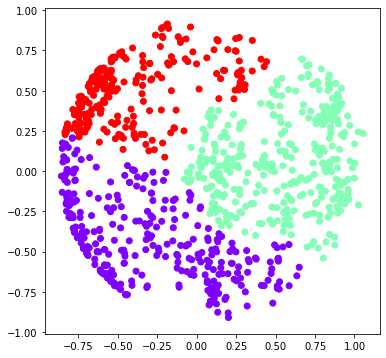

In [ ]:
ac3 = AgglomerativeClustering(n_clusters = 3) 

plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
		c = ac3.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 


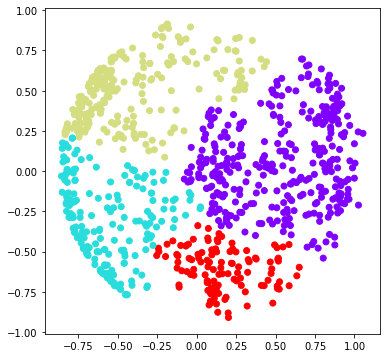

In [ ]:
ac4 = AgglomerativeClustering(n_clusters = 4) 

plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
			c = ac4.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 


In [ ]:
Y = pd.read_csv(test_url) 

# Dropping the CUST_ID column from the data  
Y = Y.drop('Name', axis = 1)
Y = Y.drop('Sex', axis = 1)
Y = Y.drop('Ticket', axis = 1)
Y = Y.drop('Cabin', axis = 1)
Y = Y.drop('Embarked', axis = 1)


# Handling the missing values 
Y.fillna(method ='ffill', inplace = True) 

print(Y.head()) 


   PassengerId  Pclass   Age  SibSp  Parch     Fare
0          892       3  34.5      0      0   7.8292
1          893       3  47.0      1      0   7.0000
2          894       2  62.0      0      0   9.6875
3          895       3  27.0      0      0   8.6625
4          896       3  22.0      1      1  12.2875


In [ ]:
# Scaling the data to bring all the attributes to a comparable level 
scaler_te = StandardScaler() 
Y_scaled = scaler_te.fit_transform(Y) 

# Normalizing the data so that 
# the data approximately follows a Gaussian distribution 
Y_normalized = normalize(Y_scaled) 

# Converting the numpy array into a pandas DataFrame 
Y_normalized = pd.DataFrame(Y_normalized) 


In [ ]:
pca = PCA(n_components = 2) 
Y_principal = pca.fit_transform(Y_normalized) 
Y_principal = pd.DataFrame(Y_principal) 
Y_principal.columns = ['P1', 'P2'] 
print(Y_principal.head())

         P1        P2
0 -0.384581  0.785975
1 -0.070577  0.726635
2  0.355485  0.631767
3 -0.498326  0.768776
4 -0.349062  0.745943


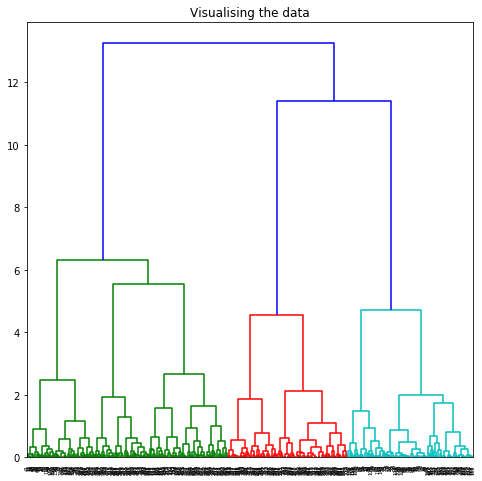

In [ ]:
plt.figure(figsize =(8, 8)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(Y_principal, method ='ward'))) 


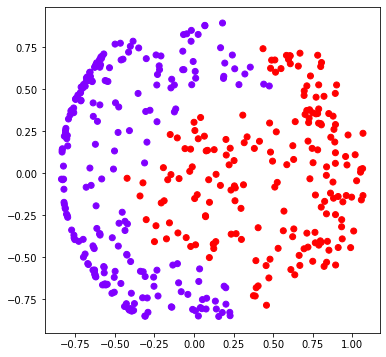

In [ ]:
ac2 = AgglomerativeClustering(n_clusters = 2) 
  
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(Y_principal['P1'], Y_principal['P2'],  
           c = ac2.fit_predict(Y_principal), cmap ='rainbow') 
plt.show() 

In [ ]:
    cluster_labels = ac2.fit_predict(Y_principal)
    silhouette_avg = silhouette_score(Y_principal, cluster_labels)
    print("For Agglomerative Y,n_clusters =", 2,
          "The average silhouette_score is :", silhouette_avg)

For Agglomerative Y,n_clusters = 2 The average silhouette_score is : 0.3319929839377579


In [ ]:
cluster_labels = ac2.fit_predict(X_principal)
silhouette_avg = silhouette_score(X_principal, cluster_labels)
print("For Agglomerative X,n_clusters =", 2,
          "The average silhouette_score is :", silhouette_avg)

For Agglomerative X,n_clusters = 2 The average silhouette_score is : 0.3302678254115047
